<a href="https://colab.research.google.com/github/amrutask/Machine_Learning/blob/master/HomeWork1/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
class logistic_regression():
  
  def __init__(self, size):
    
    self.weights = np.zeros((size,1))
    self.bias = 0.0
    self.accuracy=0.0
      
  
  def train_and_optimize(self, train_x, train_y, learning_rate=0.01, num_iters=50, mini_batch_size=200):
    
    w = np.zeros((train_x.shape[0],1))
    b=0.0
    m = train_x.shape[1]   #no of training smaples
    print("No of training examples:", m)
    num_batches=int(m/mini_batch_size)
    costs=[] 
    
    #mini batch gradient descent
    for i in range(num_iters):
      
      batch_cost=[]
      shuffled_indices = np.random.permutation(m)       
      train_x = train_x[:,shuffled_indices]
      train_y = train_y[shuffled_indices]
      start=0
      end=mini_batch_size-1
      
      for j in range(num_batches):
        X=train_x[:, start:end]
        Y=train_y[start:end]
        
        A = 1/(1 + np.exp(-((np.dot(w.transpose(),X))+ b)))  # compute activation
        #Mean Squared Error
        cost = (1/mini_batch_size) *  np.sum(np.dot((A-Y).transpose(),(A-Y)))
        
        dz=np.dot(A.transpose(),(1-A))
        temp=np.dot(X, dz)
        dw = (1/mini_batch_size) * np.dot(temp,(A-Y).transpose())
        db = (1/mini_batch_size) * np.sum(np.dot(dz,(A-Y).transpose()))
        cost = np.squeeze(cost)
  
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        batch_cost.append(cost)
        start=start+mini_batch_size
        end=end+mini_batch_size
        
      costs.append(sum(batch_cost) / len(batch_cost))
    
      if i%25==0 or i==num_iters-1:
        print("Cost after {} iterations: {}".format(i, sum(costs)/len(costs)))
    
    self.weights=w
    self.bias=b
    
 
  def predict(self, test_x, Label):
  
    A = 1/(1 + np.exp(-((np.dot(self.weights.transpose(),test_x))+ self.bias)))
    m = A.shape[1]
    Y_pred = np.zeros((1, m))
  
    for i in range(A.shape[1]):
      # Convert probabilities A to actual predictions
        
      if A[0,i]<= 0.5 :
        Y_pred[0, i] = 0
      else :
        Y_pred[0, i] = 1
  
    self.accuracy=((np.sum(Y_pred==Label))/m) * 100
    
    return(self.accuracy)
  
  
  def calc_probability(self, image_features):
    
    prob=1/(1 + np.exp(-((np.dot(self.weights.transpose(),image_features))+ self.bias)))
    
    return(prob)

In [22]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

train_x_flat = x_train.reshape(x_train.shape[0],-1).T
test_x_flat = x_test.reshape(x_test.shape[0],-1).T

train_x, test_x = train_x_flat / 255.0, test_x_flat / 255.0
print("Size of training data:",train_x.shape)
print("Size of test data:",test_x.shape)

#one hot encoding of the labels
train_y= np.eye(10)[y_train]
test_y = np.eye(10)[y_test]
print("Size of training labels:", train_y.shape)
print("Size of test labels:", test_y.shape)

no_classes=10  #0 to 9 digits

#one vs all approach
digits=[]
for i in range(no_classes):
  lgr=logistic_regression(train_x.shape[0])
  print("\nTraining class {} vs others.....".format(i))
  lgr.train_and_optimize(train_x, train_y[:,i])
  acc=lgr.predict(test_x, test_y[:,i])
  print("\nAccuracy of predicting {} is: {}".format(i, acc))
  digits.append(lgr)
  

Size of training data: (784, 60000)
Size of test data: (784, 10000)
Size of training labels: (60000, 10)
Size of test labels: (10000, 10)

Training class 0 vs others.....
No of training examples: 60000
Cost after 0 iterations: 0.7546375083460604
Cost after 25 iterations: 0.11461020396875919
Cost after 49 iterations: 0.0919236487911317

Accuracy of predicting 0 is: 98.02

Training class 1 vs others.....
No of training examples: 60000
Cost after 0 iterations: 0.8082383855278555
Cost after 25 iterations: 0.13757280934701888
Cost after 49 iterations: 0.11267435692531755

Accuracy of predicting 1 is: 98.61999999999999

Training class 2 vs others.....
No of training examples: 60000
Cost after 0 iterations: 0.7241385957447622
Cost after 25 iterations: 0.11725292195349635
Cost after 49 iterations: 0.09467699573569455

Accuracy of predicting 2 is: 95.74000000000001

Training class 3 vs others.....
No of training examples: 60000
Cost after 0 iterations: 0.7609194582658358
Cost after 25 iteration

Enter any image from 0 to 60000 for prediction: 7890

Probability of the number being 0 is: [0.0063432]

Probability of the number being 1 is: [0.00047228]

Probability of the number being 2 is: [0.00336775]

Probability of the number being 3 is: [0.00206402]

Probability of the number being 4 is: [0.06258802]

Probability of the number being 5 is: [0.00648606]

Probability of the number being 6 is: [0.00285079]

Probability of the number being 7 is: [0.18414813]

Probability of the number being 8 is: [0.03239196]

Probability of the number being 9 is: [0.64114603]

Predicted number is: 9


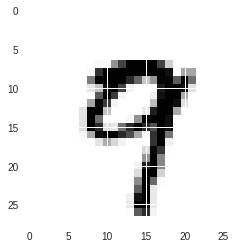

In [25]:
No_to_predict = input("Enter any image from 0 to 60000 for prediction: ")

plt.imshow(train_x[:,int(No_to_predict)].reshape((28,28)))
predictions=[]

for i in range(no_classes):
  lgr=digits[i]
  prob=lgr.calc_probability(train_x[:,int(No_to_predict)])
  print("\nProbability of the number being {} is: {}".format(i, prob))
  predictions.append(prob)
  
preds=np.asarray(predictions)
print("\nPredicted number is:",np.argmax(preds))
  